In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
# irdata = pd.read_csv('./data/iris.data', header=None)
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

preprocessed_data = data.copy()

In [4]:
def encode_on_hypercube(data):
    """
    Метод для кодирования на гиперкуб
    
    :param data: DataFrame instance
    return DataFrame instance
    """
    def encode_by_column(column):
        minimum, maximum = np.min(column), np.max(column)
        return np.apply_along_axis(lambda x: 2 * (x - minimum) / (maximum - minimum) - 1, 0, column)
    
    return np.apply_along_axis(encode_by_column, 0, data)

In [5]:
def get_means(data):
    """
    Метод для получения среднего по столбцам
    """
    return np.mean(data, axis=0)

In [6]:
def center(data):
    means = get_means(data)
    assert means.shape == (4,)
    
    for index, column in enumerate(data.T):
        column -= means[index]
    return data

In [7]:
def generate_weights(height, width, start, end):
    return np.random.uniform(start, end, (height, width))

In [8]:
def normilize(weights):
    return np.sum(weights**2) ** (1./2)

In [19]:
def MyPCA(copied_data):
    data = copied_data.copy()
    records_count, attributes_count = data.shape
    
    weights = generate_weights(attributes_count, attributes_count, -1, 1)
    weights /= normilize(weights)

    assert weights.shape == (attributes_count, attributes_count)
    
    results = np.zeros(data.shape)
    
    for number, row_weights in enumerate(weights.T):
        
        for epoch in range(10 ** (number + 1)):
            
            for record_number, row_result in enumerate(results):
                row_result[number] = row_weights.dot(data[record_number]).item()

                row_weights += (row_result[number] 
                                * (data[record_number] - row_result[number] * row_weights) / records_count)
                row_weights /= normilize(row_weights)
        
        for record_number, row_data in enumerate(data):
            row_data -= results[record_number][number] * row_weights
    
    return results, weights            

In [10]:
preprocessed_data = encode_on_hypercube(preprocessed_data)
preprocessed_data

array([[-5.55555556e-01,  2.50000000e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-6.66666667e-01, -1.66666667e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-7.77777778e-01,  0.00000000e+00, -8.98305085e-01,
        -9.16666667e-01],
       [-8.33333333e-01, -8.33333333e-02, -8.30508475e-01,
        -9.16666667e-01],
       [-6.11111111e-01,  3.33333333e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-3.88888889e-01,  5.83333333e-01, -7.62711864e-01,
        -7.50000000e-01],
       [-8.33333333e-01,  1.66666667e-01, -8.64406780e-01,
        -8.33333333e-01],
       [-6.11111111e-01,  1.66666667e-01, -8.30508475e-01,
        -9.16666667e-01],
       [-9.44444444e-01, -2.50000000e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-6.66666667e-01, -8.33333333e-02, -8.30508475e-01,
        -1.00000000e+00],
       [-3.88888889e-01,  4.16666667e-01, -8.30508475e-01,
        -9.16666667e-01],
       [-7.22222222e-01,  1.66666667e-01, -7.96610169e-01,
      

In [11]:
preprocessed_data = center(preprocessed_data)
preprocessed_data

array([[-4.12962963e-01,  3.68888889e-01, -7.99322034e-01,
        -8.32777778e-01],
       [-5.24074074e-01, -4.77777778e-02, -7.99322034e-01,
        -8.32777778e-01],
       [-6.35185185e-01,  1.18888889e-01, -8.33220339e-01,
        -8.32777778e-01],
       [-6.90740741e-01,  3.55555556e-02, -7.65423729e-01,
        -8.32777778e-01],
       [-4.68518519e-01,  4.52222222e-01, -7.99322034e-01,
        -8.32777778e-01],
       [-2.46296296e-01,  7.02222222e-01, -6.97627119e-01,
        -6.66111111e-01],
       [-6.90740741e-01,  2.85555556e-01, -7.99322034e-01,
        -7.49444444e-01],
       [-4.68518519e-01,  2.85555556e-01, -7.65423729e-01,
        -8.32777778e-01],
       [-8.01851852e-01, -1.31111111e-01, -7.99322034e-01,
        -8.32777778e-01],
       [-5.24074074e-01,  3.55555556e-02, -7.65423729e-01,
        -9.16111111e-01],
       [-2.46296296e-01,  5.35555556e-01, -7.65423729e-01,
        -8.32777778e-01],
       [-5.79629630e-01,  2.85555556e-01, -7.31525424e-01,
      

In [32]:
components, weights = MyPCA(preprocessed_data)

In [13]:
components

array([[-1.25635500e+00,  2.47162101e-01, -3.15136954e-02,
         1.94811166e-02],
       [-1.25065861e+00, -1.76589247e-01, -9.19854331e-02,
         6.97158039e-02],
       [-1.34119031e+00, -6.85668002e-02,  4.58434233e-02,
         1.99320430e-02],
       [-1.31316080e+00, -1.72213890e-01,  5.28193436e-02,
        -3.52793021e-02],
       [-1.29060940e+00,  2.99860097e-01,  3.62028921e-02,
        -1.87053169e-02],
       [-1.05696600e+00,  6.06130214e-01,  5.55529675e-02,
         3.33214708e-03],
       [-1.31217631e+00,  5.50629059e-02,  1.89907007e-01,
        -2.51006844e-02],
       [-1.24972645e+00,  1.46115778e-01, -2.21465868e-02,
        -9.13690307e-03],
       [-1.35827583e+00, -3.66642834e-01,  7.86767735e-02,
        -1.26951674e-02],
       [-1.29447580e+00, -1.01450021e-01, -1.17123356e-01,
        -1.28129592e-02],
       [-1.18572026e+00,  4.64424450e-01, -9.71192505e-02,
         1.70094483e-02],
       [-1.27701989e+00,  9.77627260e-02,  5.49385954e-02,
      

In [14]:
weights

array([[ 0.43368247,  0.42672773, -0.71158176,  0.358345  ],
       [-0.12689568,  0.90275994,  0.3340303 , -0.21521897],
       [ 0.61138599, -0.05529648, -0.06482648, -0.78895813],
       [ 0.65012871, -0.00358331,  0.6147322 ,  0.45034968]])

In [15]:
components.dot(weights.T)

array([[-0.40998268,  0.36783483, -0.7951119 , -0.82827728],
       [-0.52730677, -0.04644461, -0.80391015, -0.83760621],
       [-0.63638887,  0.11931523, -0.83489088, -0.83454281],
       [-0.6932107 ,  0.03640266, -0.76891549, -0.83652471],
       [-0.46422032,  0.45059304, -0.7932309 , -0.82630556],
       [-0.23807147,  0.69915373, -0.6859613 , -0.65368507],
       [-0.68970006,  0.28505492, -0.79779861, -0.74784293],
       [-0.46714785,  0.28506116, -0.76350061, -0.83073564],
       [-0.80605128, -0.12961847, -0.80524114, -0.83909244],
       [-0.52593161,  0.03631321, -0.76811295, -0.91898216],
       [-0.24083976,  0.53362504, -0.75773763, -0.82457709],
       [-0.57840875,  0.28499925, -0.72980676, -0.83100421],
       [-0.58249844, -0.04662282, -0.8034328 , -0.92047797],
       [-0.86106317, -0.04651781, -0.90614195, -0.92157842],
       [-0.01461369,  0.78233249, -0.85378155, -0.81848082],
       [-0.06838259,  1.11467349, -0.74944343, -0.64907843],
       [-0.24205686,  0.

In [16]:
pca = PCA(n_components=4)
X_r = pca.fit(data).transform(data)

X_r

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

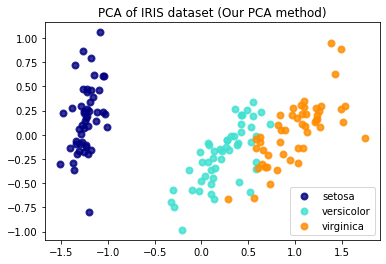

In [33]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(components[target == i, 0], components[target == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset (Our PCA method)')
plt.show()

In [ ]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[target == i, 0], X_r[target == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset (Sklearn PCA method)')
plt.show()